<a href="https://colab.research.google.com/github/kenlo94/Affordable_Housing_2023/blob/rob_data_analytics/SantaCruz%26Shasta_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SANTA CRUZ COUNTY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

RealData_df = pd.read_csv(io.BytesIO(uploaded['Santa Cruz County.csv']), index_col='Dates',parse_dates=True)
print(RealData_df)

Saving Santa Cruz County.csv to Santa Cruz County.csv
            Santa Cruz County
Dates                        
2000-01-31             352881
2000-02-29             354852
2000-03-31             357736
2000-04-30             363779
2000-05-31             370354
...                       ...
2021-12-31            1173679
2022-01-31            1193707
2022-02-28            1228141
2022-03-31            1274175
2022-04-30            1316889

[268 rows x 1 columns]


In [ ]:
RealData_df = RealData_df.dropna()
RealData_df

,Santa Cruz County
Dates,
2000-01-31,352881
2000-02-29,354852
2000-03-31,357736
2000-04-30,363779
2000-05-31,370354
...,...
2021-12-31,1173679
2022-01-31,1193707
2022-02-28,1228141


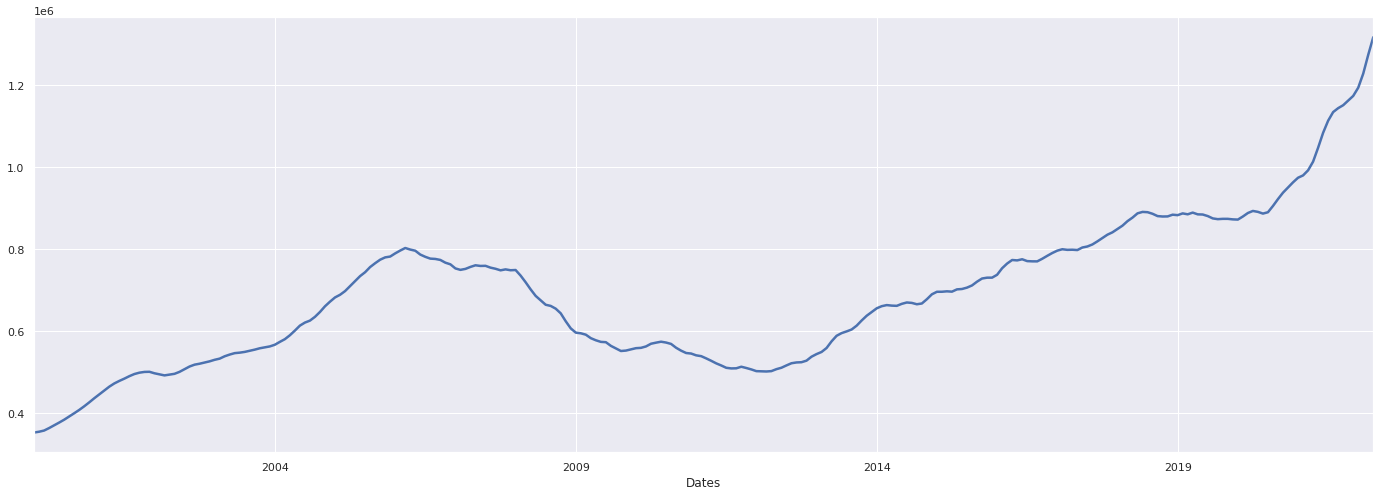

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24, 8)})
RealData_df['Santa Cruz County'].plot(linewidth=2.5);
#RealData_df.plot

In [ ]:
len(RealData_df)

268

In [ ]:
DATOS = RealData_df['Santa Cruz County'].values

# Primero dividamos los sets entre train y test
# En este caso la partición no puede ser aleatoria
# (se debe preservar el orden de la secuencia)
TRAIN_SIZE = 0.85
idx = round(len(DATOS)*TRAIN_SIZE)
datos_train = DATOS[0:idx]
datos_test = DATOS[idx:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()

scaler = MinMaxScaler(feature_range=(-1,1))
datos_train_s = scaler.fit_transform(datos_train.reshape(-1,1))
datos_test_s = scaler.transform(datos_test.reshape(-1,1))

LONG_SEC = 2

X_train, Y_train = [], []
for i in range(len(datos_train_s)-LONG_SEC):
  X_train.append(datos_train_s[i:i+LONG_SEC])
  Y_train.append(datos_train_s[i+LONG_SEC])

X_test, Y_test = [], []
for i in range(len(datos_test_s)-LONG_SEC):
  X_test.append(datos_test_s[i:i+LONG_SEC])
  Y_test.append(datos_test_s[i+LONG_SEC])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(226, 2, 1) (226, 1)
(38, 2, 1) (38, 1)


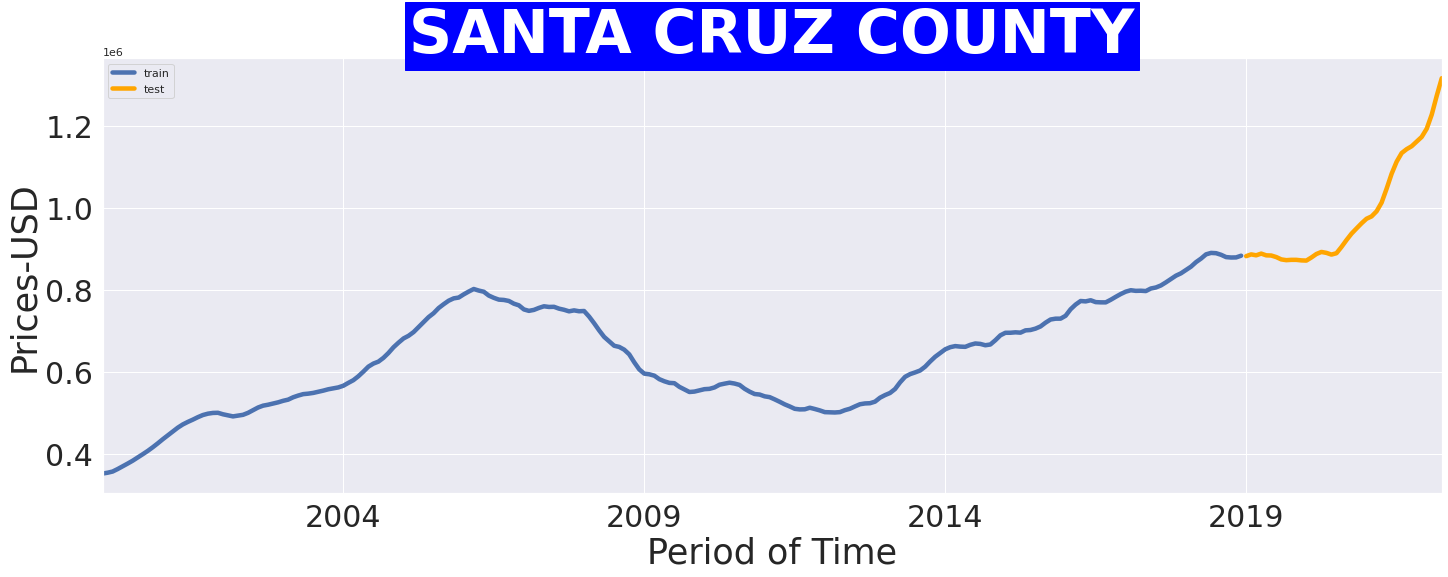

In [ ]:
RealData_df['Santa Cruz County'].iloc[0:idx].plot(linewidth=4.5, label='train', figsize=(24,8))
RealData_df['Santa Cruz County'].iloc[idx:].plot(linewidth=4.5, color='orange', label='test')
plt.title("SANTA CRUZ COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend();

In [ ]:
# Creating the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Seed for Random Generators
SEED = 88
tf.random.set_seed(SEED)
np.random.seed(SEED)

# El modelo
N_UNITS = 150
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=(LONG_SEC,1)))
modelo.add(Dense(1))

In [ ]:
# Compilación y entrenamiento
optimizador = RMSprop(learning_rate=0.0005)
modelo.compile(optimizer=optimizador, loss='mse', metrics='mean_absolute_error')

# Entrenamiento
EPOCHS = 60
BATCH_SIZE = 5
modelo.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
           validation_data = (X_test, Y_test))

Epoch 1/60
46/46 [==============================] - 3s 15ms/step - loss: 0.1468 - mean_absolute_error: 0.3287 - val_loss: 0.6267 - val_mean_absolute_error: 0.7365
Epoch 2/60
46/46 [==============================] - 0s 4ms/step - loss: 0.0312 - mean_absolute_error: 0.1431 - val_loss: 0.0302 - val_mean_absolute_error: 0.1425
Epoch 3/60
46/46 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_absolute_error: 0.0376 - val_loss: 0.0119 - val_mean_absolute_error: 0.0765
Epoch 4/60
46/46 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_absolute_error: 0.0331 - val_loss: 0.0085 - val_mean_absolute_error: 0.0677
Epoch 5/60
46/46 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_absolute_error: 0.0328 - val_loss: 0.0150 - val_mean_absolute_error: 0.0861
Epoch 6/60
46/46 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_absolute_error: 0.0323 - val_loss: 0.0065 - val_mean_absolute_error: 0.0628
Epoch 7/60
46/46 [=========

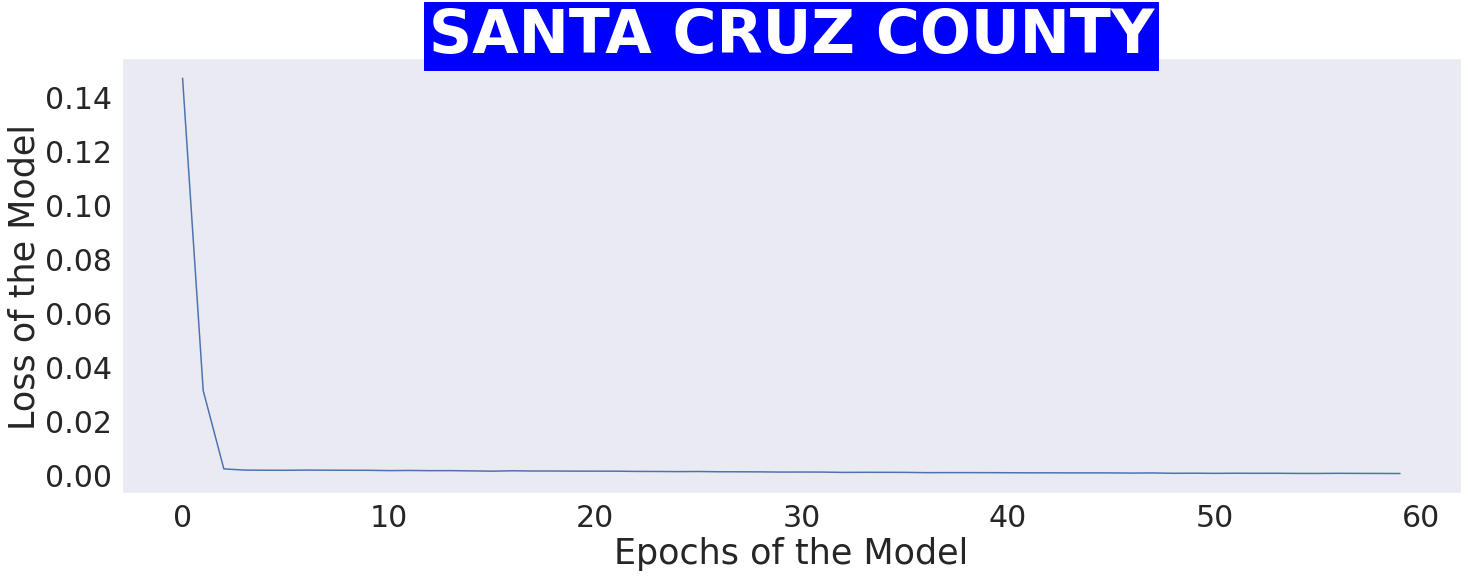

In [ ]:
from matplotlib import pyplot as plt

loss_per_epoch = modelo.history.history['loss']
plt.figure(figsize=(24,8))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Epochs of the Model', fontsize=35)
plt.ylabel('Loss of the Model', fontsize=35)
plt.title("SANTA CRUZ COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.grid()

In [ ]:
# Print the Prediction in a Array (1 sample, single-step)
y_pred = [y[0] for y in modelo.predict(X_test)]
y_pred = np.array(y_pred)
y_pred

array([0.9684258 , 0.9510282 , 0.9753511 , 0.9478223 , 0.9515489 ,
       0.9327261 , 0.9086753 , 0.90742725, 0.91404074, 0.91287655,
       0.90610266, 0.9054501 , 0.9447839 , 0.9779405 , 0.991686  ,
       0.97324693, 0.9548427 , 0.97756636, 1.0508804 , 1.1155896 ,
       1.1725936 , 1.2171648 , 1.2640997 , 1.3056357 , 1.3215448 ,
       1.3762457 , 1.466332  , 1.6080159 , 1.7505076 , 1.8615048 ,
       1.9417933 , 1.9765928 , 2.0053236 , 2.0527906 , 2.099271  ,
       2.182747  , 2.3247337 , 2.5128448 ], dtype=float32)

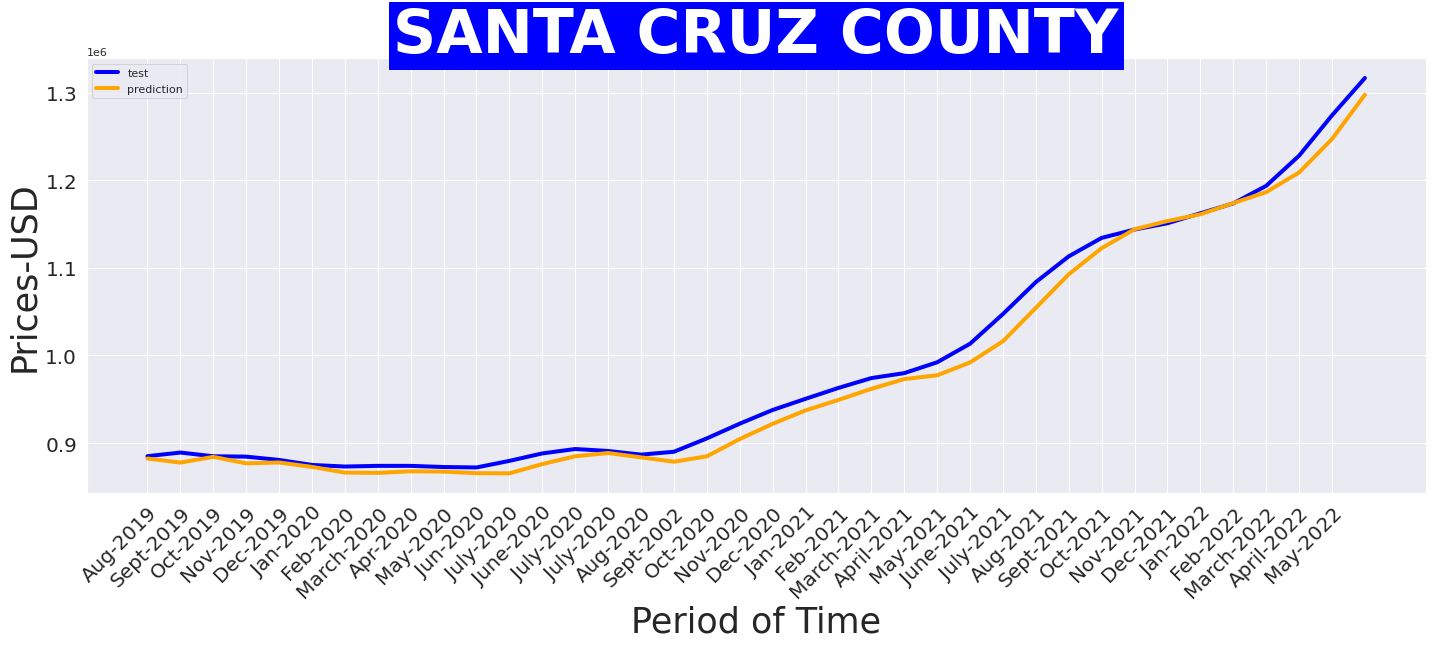

In [ ]:
# Predictions to the Original Scale
import numpy as np
y_test_inv = scaler.inverse_transform(Y_test)
y_pred_inv = y_pred.reshape(-1,1)
y_pred_inv = scaler.inverse_transform(y_pred_inv)

labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2020',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022','Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(y_test_inv[0:38],color='blue',label='test', linewidth=4.0)
plt.plot(y_pred_inv[0:38],color='orange',label='prediction', linewidth=4.0)
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=45, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()

plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("SANTA CRUZ COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")

plt.legend();

No handles with labels found to put in legend.


Text(0.5, 1.0, 'SANTA CRUZ COUNTY')

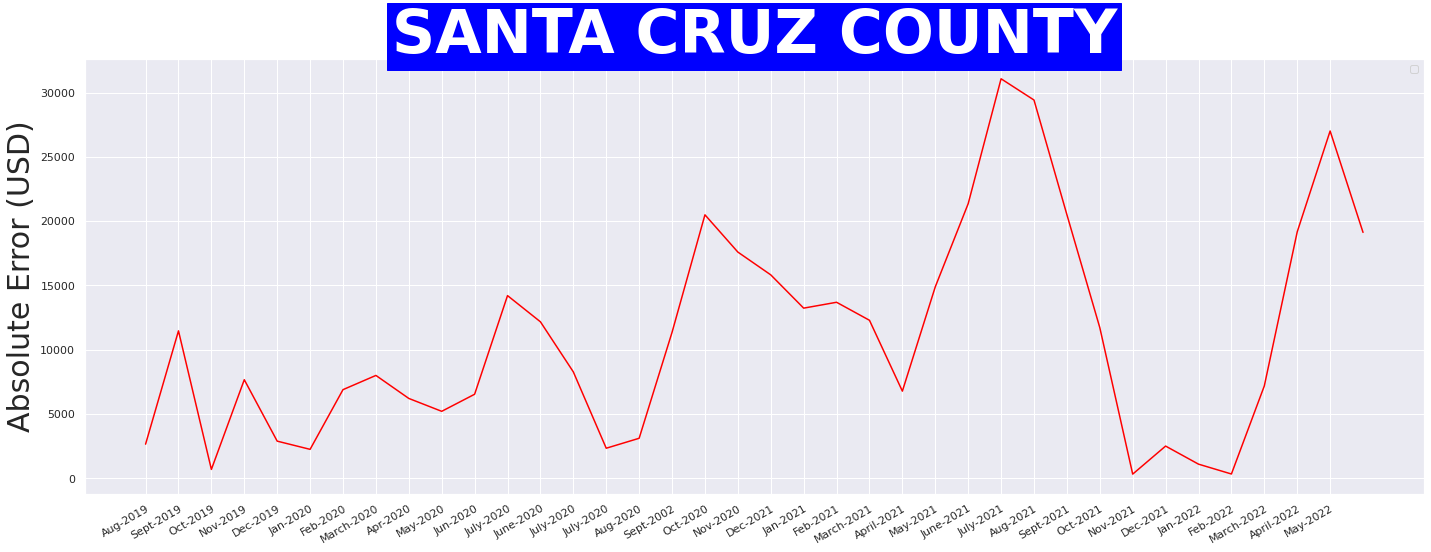

In [ ]:
# Drawing the Absolute Error as USD
labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2021',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022',
          'Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(np.abs(y_test_inv-y_pred_inv), color='red')
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=30, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()
plt.ylabel('Absolute Error (USD)', fontsize=30)
plt.title("SANTA CRUZ COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")

#plt.grid()

In [ ]:
y_pred_inv

array([[ 882346.2 ],
       [ 877666.6 ],
       [ 884209.  ],
       [ 876804.25],
       [ 877806.7 ],
       [ 872743.7 ],
       [ 866274.56],
       [ 865938.9 ],
       [ 867717.75],
       [ 867404.6 ],
       [ 865582.6 ],
       [ 865407.06],
       [ 875987.06],
       [ 884905.44],
       [ 888602.7 ],
       [ 883643.  ],
       [ 878692.6 ],
       [ 884804.8 ],
       [ 904524.8 ],
       [ 921930.2 ],
       [ 937263.06],
       [ 949251.8 ],
       [ 961876.25],
       [ 973048.6 ],
       [ 977327.8 ],
       [ 992041.25],
       [1016272.5 ],
       [1054382.5 ],
       [1092709.8 ],
       [1122565.6 ],
       [1144161.6 ],
       [1153521.9 ],
       [1161249.9 ],
       [1174017.6 ],
       [1186519.8 ],
       [1208973.1 ],
       [1247164.6 ],
       [1297762.5 ]], dtype=float32)

# **SHASTA COUNTY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

RealData_df = pd.read_csv(io.BytesIO(uploaded['Shasta County.csv']), index_col='Dates',parse_dates=True)
print(RealData_df)

Saving Shasta County.csv to Shasta County.csv
            Shasta County
Dates                    
2000-01-31          78996
2000-02-29          78933
2000-03-31          79111
2000-04-30          79440
2000-05-31          79892
...                   ...
2021-12-31         367201
2022-01-31         369854
2022-02-28         373751
2022-03-31         376361
2022-04-30         381462

[268 rows x 1 columns]


In [ ]:
RealData_df = RealData_df.dropna()
RealData_df

,Shasta County
Dates,
2000-01-31,78996
2000-02-29,78933
2000-03-31,79111
2000-04-30,79440
2000-05-31,79892
...,...
2021-12-31,367201
2022-01-31,369854
2022-02-28,373751


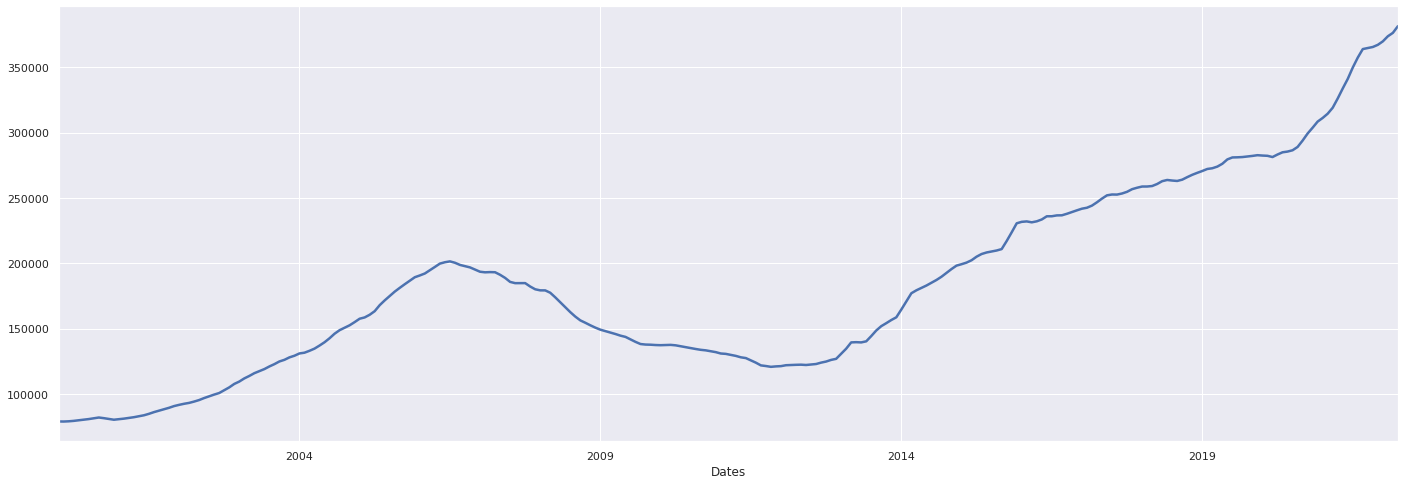

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24, 8)})
RealData_df['Shasta County'].plot(linewidth=2.5);
#RealData_df.plot

In [ ]:
len(RealData_df)

268

In [ ]:
DATOS = RealData_df['Shasta County'].values

# Primero dividamos los sets entre train y test
# En este caso la partición no puede ser aleatoria
# (se debe preservar el orden de la secuencia)
TRAIN_SIZE = 0.85
idx = round(len(DATOS)*TRAIN_SIZE)
datos_train = DATOS[0:idx]
datos_test = DATOS[idx:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler = MinMaxScaler(feature_range=(-1,1))
datos_train_s = scaler.fit_transform(datos_train.reshape(-1,1))
datos_test_s = scaler.transform(datos_test.reshape(-1,1))

LONG_SEC = 2

X_train, Y_train = [], []
for i in range(len(datos_train_s)-LONG_SEC):
  X_train.append(datos_train_s[i:i+LONG_SEC])
  Y_train.append(datos_train_s[i+LONG_SEC])

X_test, Y_test = [], []
for i in range(len(datos_test_s)-LONG_SEC):
  X_test.append(datos_test_s[i:i+LONG_SEC])
  Y_test.append(datos_test_s[i+LONG_SEC])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(226, 2, 1) (226, 1)
(38, 2, 1) (38, 1)


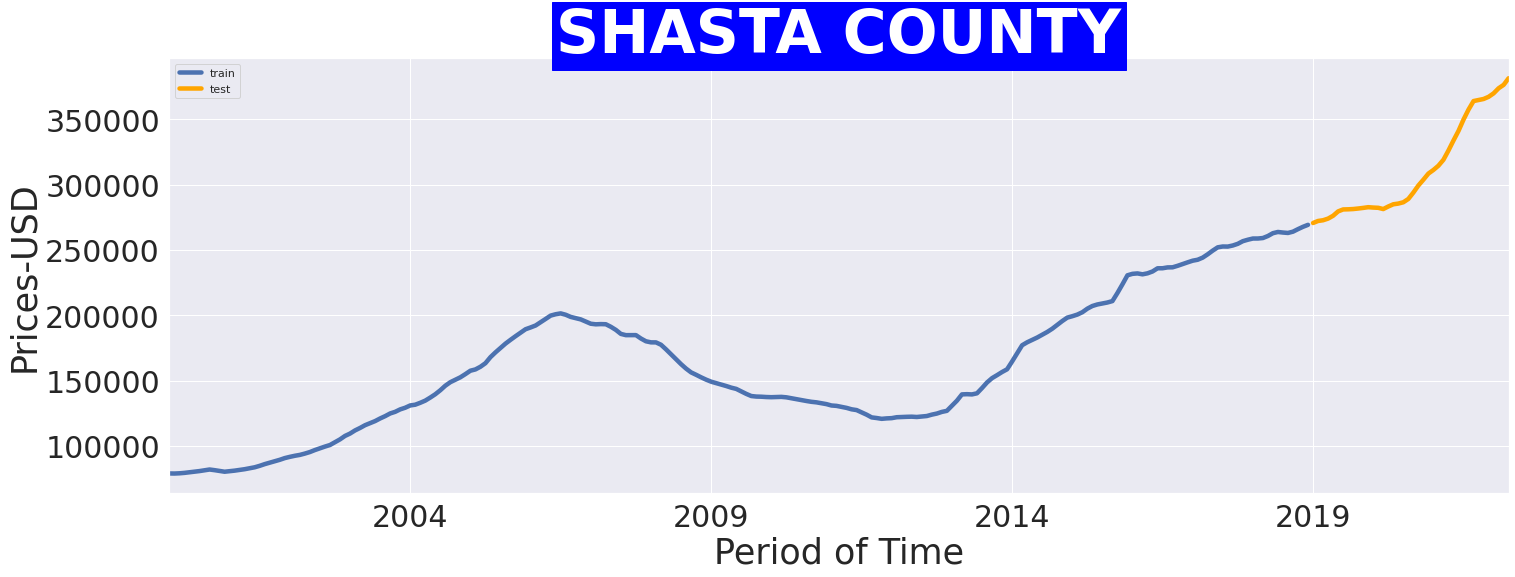

In [ ]:
RealData_df['Shasta County'].iloc[0:idx].plot(linewidth=4.5, label='train', figsize=(24,8))
RealData_df['Shasta County'].iloc[idx:].plot(linewidth=4.5, color='orange', label='test')
plt.title("SHASTA COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend();

In [ ]:
# Creating the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Seed for Random Generators
SEED = 88
tf.random.set_seed(SEED)
np.random.seed(SEED)

# El modelo
N_UNITS = 150
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=(LONG_SEC,1)))
modelo.add(Dense(1))

In [ ]:
# Compilación y entrenamiento
optimizador = RMSprop(learning_rate=0.0005)
modelo.compile(optimizer=optimizador, loss='mse', metrics='mean_absolute_error')

# Entrenamiento
EPOCHS = 60
BATCH_SIZE = 5
modelo.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
           validation_data = (X_test, Y_test))

Epoch 1/60
46/46 [==============================] - 3s 14ms/step - loss: 0.1919 - mean_absolute_error: 0.3671 - val_loss: 0.9966 - val_mean_absolute_error: 0.9661
Epoch 2/60
46/46 [==============================] - 0s 4ms/step - loss: 0.0419 - mean_absolute_error: 0.1555 - val_loss: 0.1430 - val_mean_absolute_error: 0.3491
Epoch 3/60
46/46 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0341 - val_loss: 0.0261 - val_mean_absolute_error: 0.1304
Epoch 4/60
46/46 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0274 - val_loss: 0.0193 - val_mean_absolute_error: 0.1119
Epoch 5/60
46/46 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_absolute_error: 0.0275 - val_loss: 0.0128 - val_mean_absolute_error: 0.0879
Epoch 6/60
46/46 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_absolute_error: 0.0271 - val_loss: 0.0058 - val_mean_absolute_error: 0.0590
Epoch 7/60
46/46 [=========

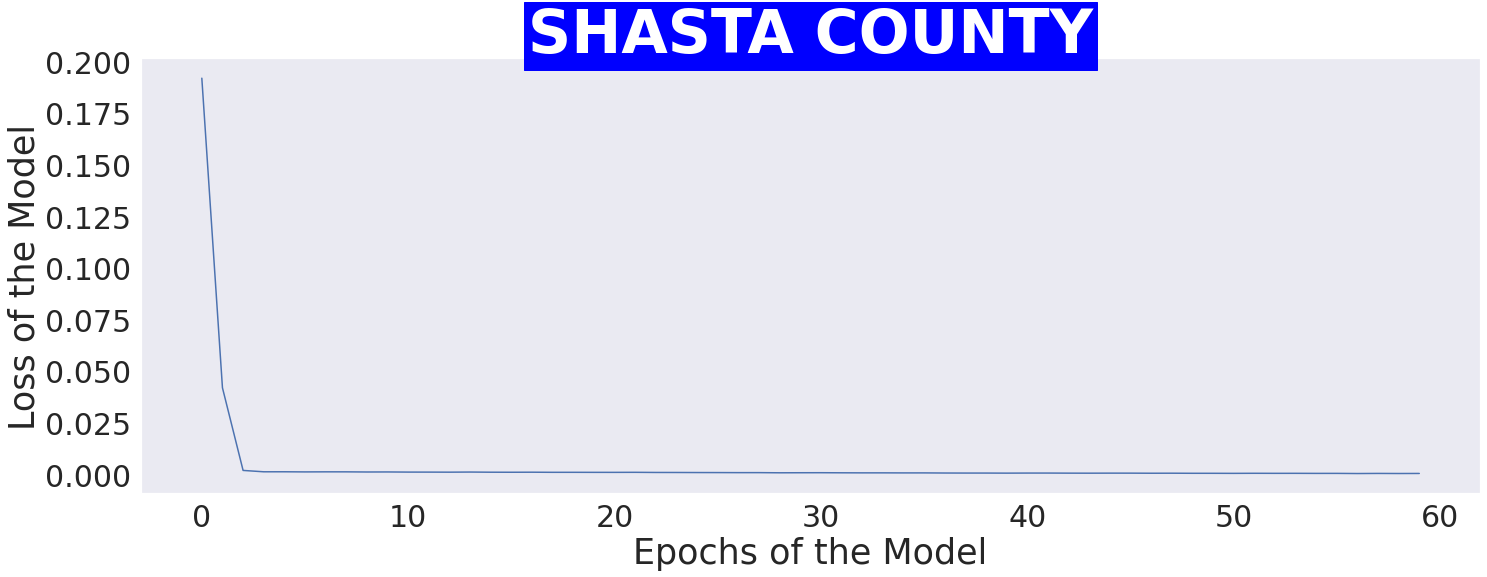

In [ ]:
from matplotlib import pyplot as plt

loss_per_epoch = modelo.history.history['loss']
plt.figure(figsize=(24,8))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Epochs of the Model', fontsize=35)
plt.ylabel('Loss of the Model', fontsize=35)
plt.title("SHASTA COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.grid()

In [ ]:
# Print the Prediction in a Array (1 sample, single-step)
y_pred = [y[0] for y in modelo.predict(X_test)]
y_pred = np.array(y_pred)
y_pred

array([1.0783265, 1.0854759, 1.098033 , 1.1198547, 1.1534832, 1.1719604,
       1.1752032, 1.1771472, 1.1811215, 1.1859876, 1.1916236, 1.1899569,
       1.1878276, 1.1789923, 1.1949718, 1.2131606, 1.2208909, 1.2306157,
       1.2546165, 1.3009913, 1.3556205, 1.403212 , 1.4504024, 1.4830256,
       1.5148994, 1.5576154, 1.6216397, 1.6954557, 1.7678707, 1.8475358,
       1.9239149, 1.9896656, 2.0171025, 2.0246537, 2.0373685, 2.059006 ,
       2.091315 , 2.1204827], dtype=float32)

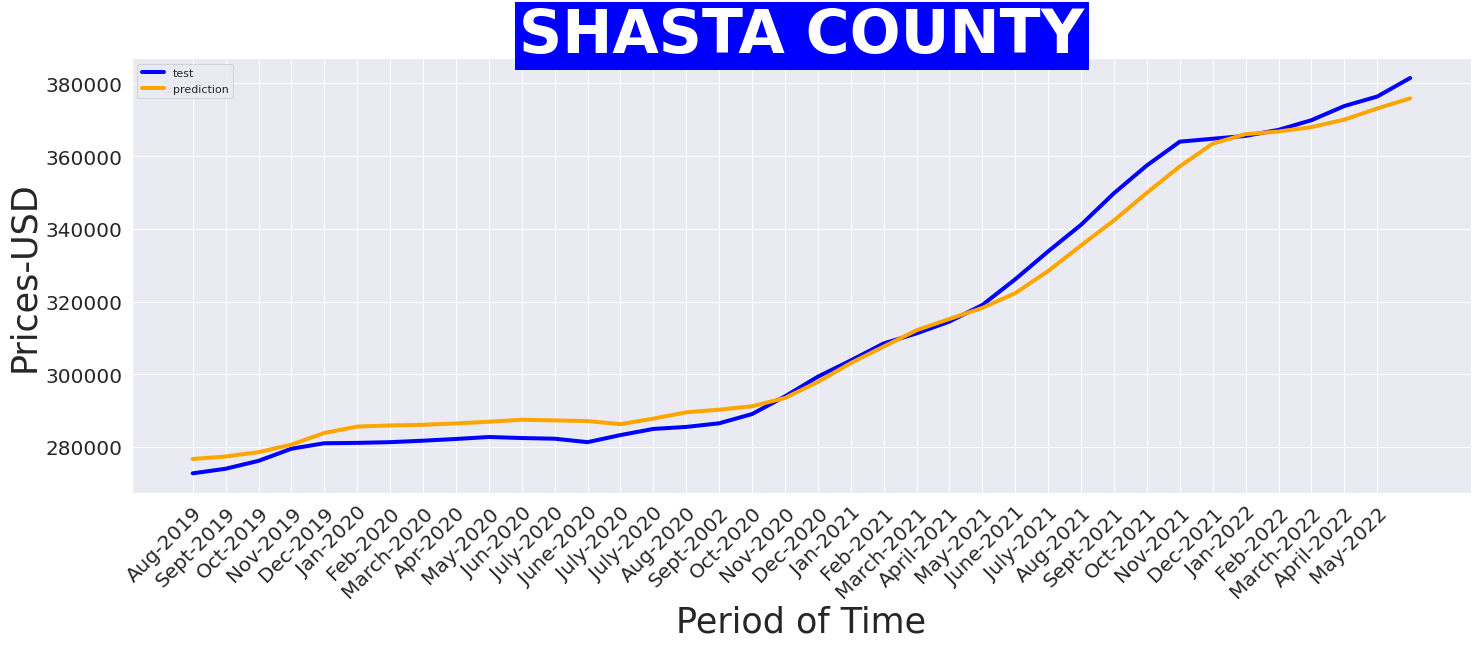

In [ ]:
# Predictions to the Original Scale
import numpy as np
y_test_inv = scaler.inverse_transform(Y_test)
y_pred_inv = y_pred.reshape(-1,1)
y_pred_inv = scaler.inverse_transform(y_pred_inv)

labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2020',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022','Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(y_test_inv[0:38],color='blue',label='test', linewidth=4.0)
plt.plot(y_pred_inv[0:38],color='orange',label='prediction', linewidth=4.0)
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=45, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()

plt.title("SHASTA COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend();

No handles with labels found to put in legend.


Text(0.5, 1.0, 'SHASTA COUNTY')

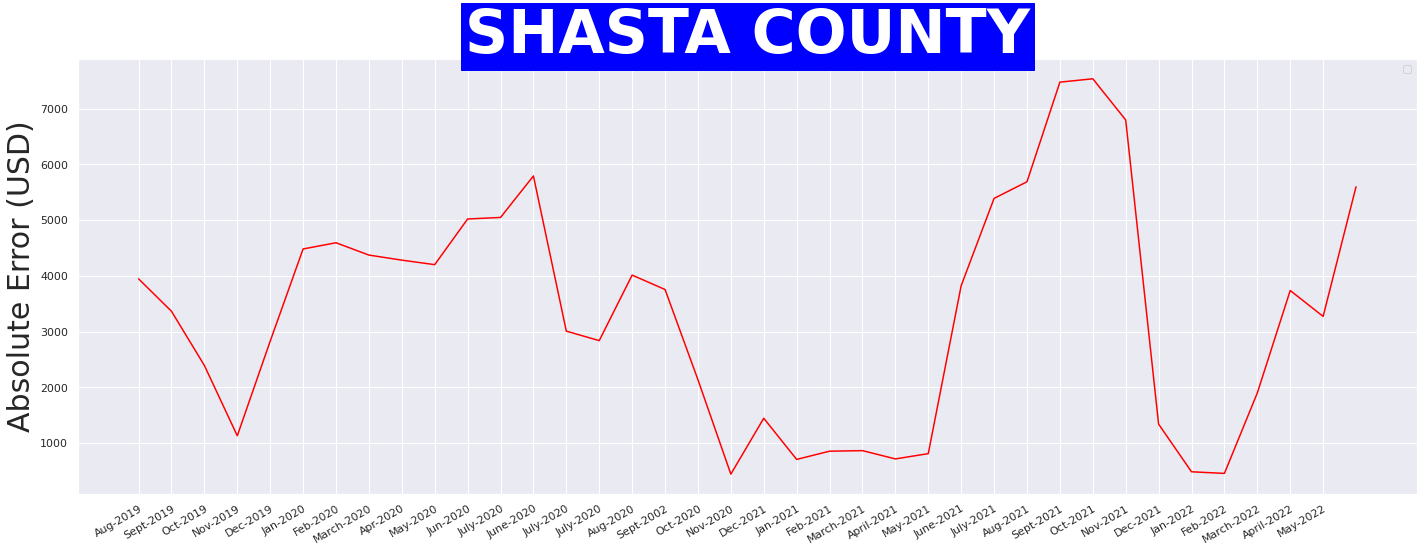

In [ ]:
# Drawing the Absolute Error as USD
labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2021',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022',
          'Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(np.abs(y_test_inv-y_pred_inv), color='red')
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=30, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()
plt.ylabel('Absolute Error (USD)', fontsize=30)
plt.title("SHASTA COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
#plt.grid()

In [ ]:
y_pred_inv

array([[276697.2 ],
       [277377.5 ],
       [278572.38],
       [280648.84],
       [283848.78],
       [285606.97],
       [285915.53],
       [286100.53],
       [286478.7 ],
       [286941.75],
       [287478.03],
       [287319.44],
       [287116.84],
       [286276.1 ],
       [287796.66],
       [289527.4 ],
       [290262.97],
       [291188.34],
       [293472.16],
       [297884.97],
       [303083.25],
       [307611.8 ],
       [312102.25],
       [315206.53],
       [318239.5 ],
       [322304.16],
       [328396.44],
       [335420.44],
       [342311.12],
       [349891.7 ],
       [357159.6 ],
       [363416.12],
       [366026.9 ],
       [366745.44],
       [367955.3 ],
       [370014.25],
       [373088.62],
       [375864.1 ]], dtype=float32)